In [1]:
import pandas as pd 

In [2]:
df = pd.read_excel("data/out/arv.xlsx")



In [3]:
df1 = pd.read_excel("../Hep/data/out/Med_Hep_dci_atc_split.xlsx")

In [5]:
df=df.drop("DCI",axis=1)
df=df.drop("ATC",axis=1)
df=df.drop("n_meds",axis=1)

In [7]:
df.to_excel("result_final.xlsx",index=False)

In [10]:
df1=df1.drop("DCI",axis=1)
df1=df1.drop("ATC",axis=1)
df1=df1.drop("n_meds",axis=1)

In [11]:
df1.to_excel("../Hep/result_final.xlsx",index=False)

In [36]:
df1

,Med_Hep,Med_1,DCI_Med1,ATC_Med1,Med_2,DCI_Med2,ATC_Med2,Med_3,DCI_Med3,ATC_Med3,Med_4,DCI_Med4,ATC_Med4,Med_5,DCI_Med5,ATC_Med5
0,Copegus + Pegasys,Copegus,RIBAVIRINE,J05AP01,Pegasys,PEGINTERFERON ALFA-2A,L03AB11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rébétol + Viraferon Peg,Rébétol,RIBAVIRINE,J05AP01,Viraferon Peg,PEGINTERFERON ALFA-2B,L03AB10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Viraferon Peg,Viraferon Peg,PEGINTERFERON ALFA-2B,L03AB10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Harvoni,Harvoni,LEDIPASVIR; SOFOSBUVIR,J05AP51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Epclusa,Epclusa,SOFOSBUVIR; VELPATASVIR,J05AP55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,Copegus + Interferon + Pegasys,Copegus,RIBAVIRINE,J05AP01,Interferon,INTROUVABLE (INTERFERON),NON_TROUVE,Pegasys,PEGINTERFERON ALFA-2A,L03AB11,NaN,NaN,NaN,NaN,NaN,NaN
282,Lamivudine (Epivir),Lamivudine (Epivir),LAMIVUDINE,J05AF05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,Incivo (Telaprevir) + Pegasys,Incivo (Telaprevir),TELAPREVIR,J05AE11,Pegasys,PEGINTERFERON ALFA-2A,L03AB11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,Emtricitabine (Emtriva) + Hepsera,Emtricitabine (Emtriva),EMTRICITABINE,J05AF09,Hepsera,ADEFOVIR DIPIVOXIL,J05AF08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df=df1

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# hep

### Nombre de médicaments par traitement

In [38]:
med_cols = [col for col in df.columns if col.startswith("Med_")]

df["nb_medicaments"] = df[med_cols].notna().sum(axis=1)

df["nb_medicaments"].describe()


count    286.000000
mean       3.409091
std        0.860714
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: nb_medicaments, dtype: float64

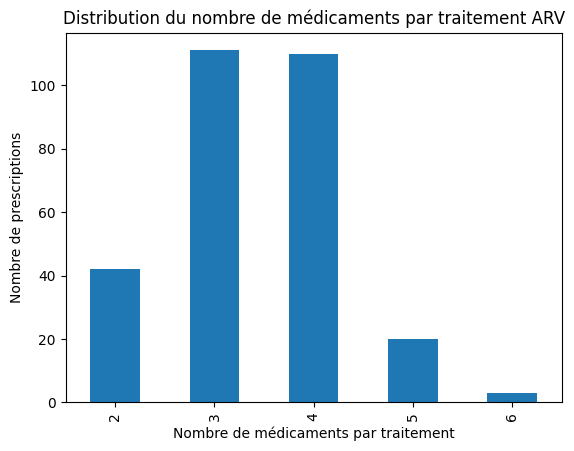

In [39]:
df["nb_medicaments"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Nombre de médicaments par traitement")
plt.ylabel("Nombre de prescriptions")
plt.title("Distribution du nombre de médicaments par traitement ARV")
plt.show()


In [40]:
def categorie_traitement(n):
    if n == 1:
        return "Monothérapie"
    elif n == 2:
        return "Bithérapie"
    elif n == 3:
        return "Trithérapie"
    else:
        return "≥ 4 médicaments"

df["type_traitement"] = df["nb_medicaments"].apply(categorie_traitement)

df["type_traitement"].value_counts()


type_traitement
≥ 4 médicaments    133
Trithérapie        111
Bithérapie          42
Name: count, dtype: int64

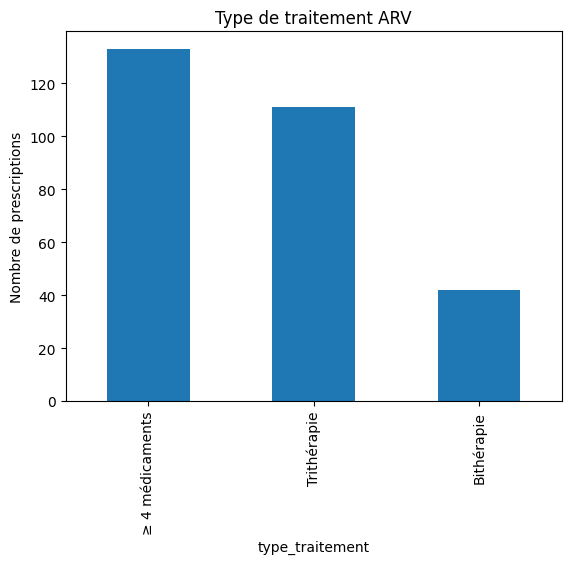

In [41]:
df["type_traitement"].value_counts().plot(kind="bar")
plt.ylabel("Nombre de prescriptions")
plt.title("Type de traitement ARV")
plt.show()


### Fréquence des médicaments (spécialités)

In [42]:
med_freq = (
    df[med_cols]
    .melt(value_name="medicament")
    .dropna()
)

med_freq["medicament"].value_counts().head(20)


medicament
Pegasys                           86
Ribavirine (Copegus / Rébétol)    71
Rébétol                           43
Interferon                        38
Copegus                           37
Sovaldi                           34
Viraferon Peg                     33
Incivo                            22
Baraclude                         18
Daklinza                          17
Ribavirine                        16
Victrelis                         14
Daclatasvir                       14
Zeffix                            14
RIBAVIRINE (Copegus / Rébétol)    13
Asunaprevir                       12
Viraféron                         12
RIBAVIRINE (Copegus)              11
Incivo (Telaprevir)               11
Mantadix                          11
Name: count, dtype: int64

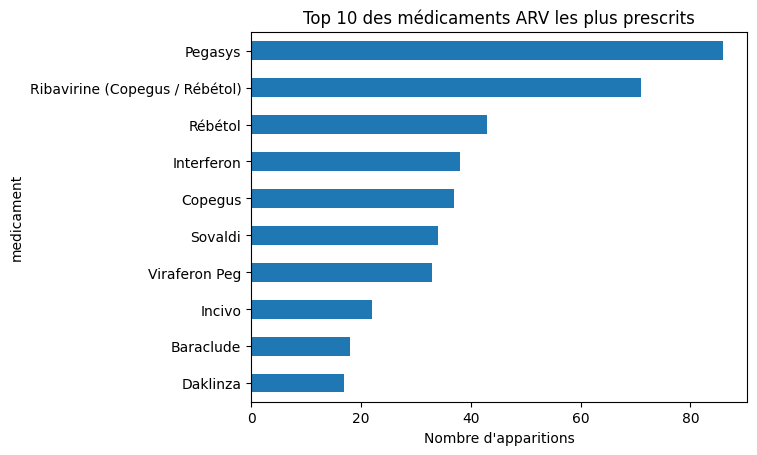

In [43]:
med_freq["medicament"].value_counts().head(10).plot(kind="barh")
plt.xlabel("Nombre d'apparitions")
plt.title("Top 10 des médicaments ARV les plus prescrits")
plt.gca().invert_yaxis()
plt.show()


In [44]:
dci_cols = [col for col in df.columns if col.startswith("DCI_")]

dci_freq = (
    df[dci_cols]
    .melt(value_name="DCI")
    .dropna()
)

dci_freq["DCI"].value_counts().head(20)


DCI
RIBAVIRINE                  196
PEGINTERFERON ALFA-2A        85
DACLATASVIR                  41
INTROUVABLE (INTERFERON)     37
SOFOSBUVIR                   33
TELAPREVIR                   33
PEGINTERFERON ALFA-2B        32
BOCEPREVIR                   23
INTERFERON ALFA-2B           20
ENTECAVIR                    17
SOFOSBUVIR; VELPATASVIR      15
LAMIVUDINE                   14
ASUNAPREVIR                  12
AMANTADINE                   10
SIMEPREVIR                    9
INTERFERON ALFA-2A            9
LEDIPASVIR; SOFOSBUVIR        9
OMBITASVIR                    8
ADEFOVIR DIPIVOXIL            8
BULEVIRTIDE                   7
Name: count, dtype: int64

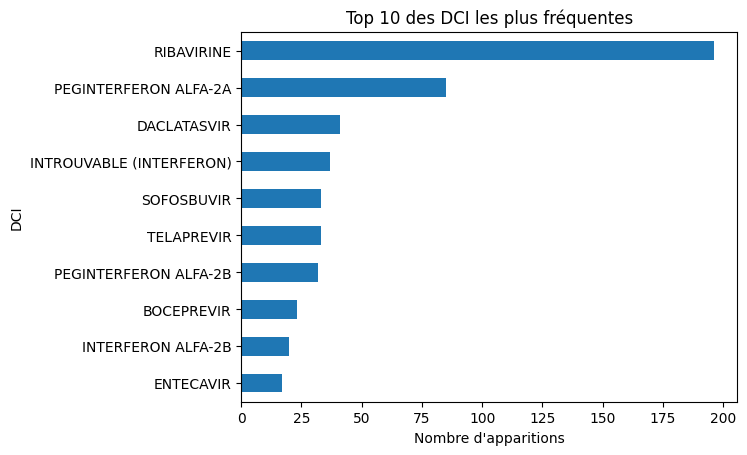

In [45]:
dci_freq["DCI"].value_counts().head(10).plot(kind="barh")
plt.xlabel("Nombre d'apparitions")
plt.title("Top 10 des DCI les plus fréquentes")
plt.gca().invert_yaxis()
plt.show()


### Analyse des classes thérapeutiques (ATC)

In [27]:
atc_cols = [col for col in df.columns if col.startswith("ATC_")]

atc_freq = (
    df[atc_cols]
    .melt(value_name="ATC")
    .dropna()
)

atc_freq["ATC"].value_counts().head(20)


ATC
J05AE03    8782
J05AF05    5888
NAN        4942
J05AF02    4817
J05AF07    4416
J05AF06    4097
J05AR10    3542
J05AG03    2885
J05AF04    2810
J05AX07    2605
J05AE01    2516
J05AG01    2295
J05AF01    2143
J05AE08    2129
J05AJ01    1909
J05AE02    1731
J05AR03    1670
J05AR01    1603
J05AE05    1568
J05AE07    1455
Name: count, dtype: int64

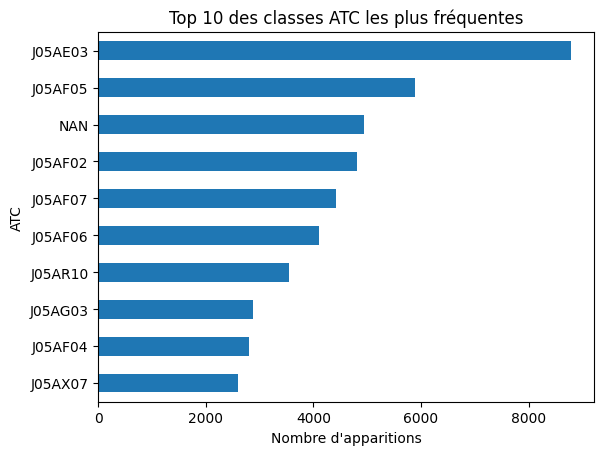

In [28]:
atc_freq["ATC"].value_counts().head(10).plot(kind="barh")
plt.xlabel("Nombre d'apparitions")
plt.title("Top 10 des classes ATC les plus fréquentes")
plt.gca().invert_yaxis()
plt.show()


### Nombre de classes ATC par traitement (complexité)

In [29]:
df["nb_classes_ATC"] = df[atc_cols].nunique(axis=1)

df["nb_classes_ATC"].describe()


count    19220.000000
mean         3.893965
std          1.167841
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         11.000000
Name: nb_classes_ATC, dtype: float64

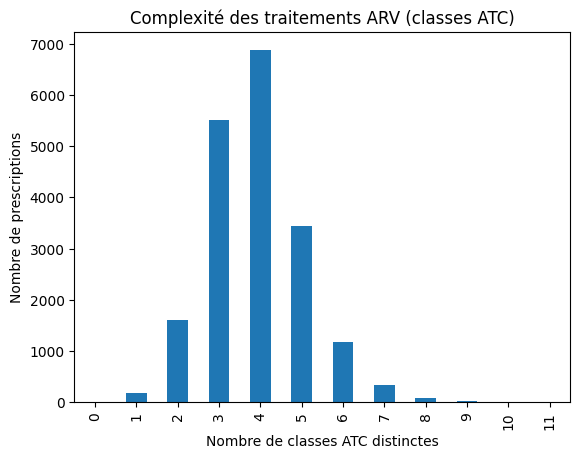

In [30]:
df["nb_classes_ATC"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Nombre de classes ATC distinctes")
plt.ylabel("Nombre de prescriptions")
plt.title("Complexité des traitements ARV (classes ATC)")
plt.show()


### Médicaments combinés (1 Med vs plusieurs Med)

In [31]:
df["type_forme"] = np.where(df["nb_medicaments"] == 1,
                            "Médicament combiné",
                            "Association de médicaments")

df["type_forme"].value_counts()


type_forme
Association de médicaments    19066
Médicament combiné              154
Name: count, dtype: int64

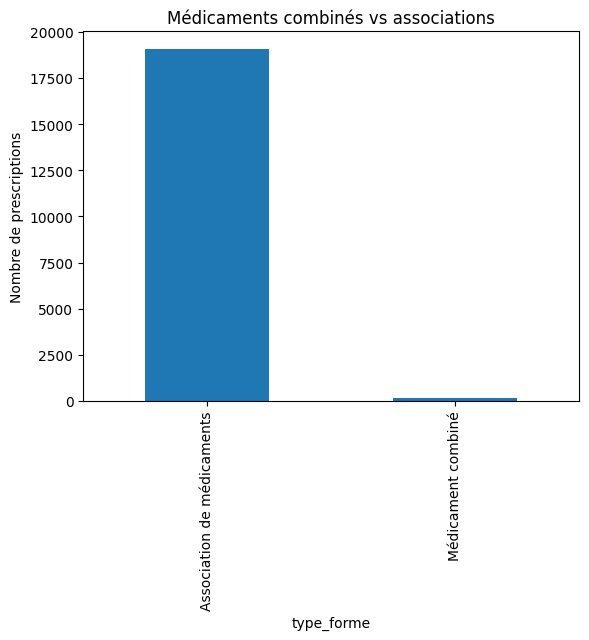

In [32]:
df["type_forme"].value_counts().plot(kind="bar")
plt.title("Médicaments combinés vs associations")
plt.ylabel("Nombre de prescriptions")
plt.show()


### Données manquantes (qualité des données)

In [33]:
missing = df.isna().mean().sort_values(ascending=False) * 100
missing.head(15)


ATC_Med11    99.984391
DCI_Med11    99.984391
Med_11       99.984391
ATC_Med10    99.968783
DCI_Med10    99.968783
Med_10       99.968783
ATC_Med9     99.869927
DCI_Med9     99.869927
Med_9        99.869927
ATC_Med8     99.365245
DCI_Med8     99.365245
Med_8        99.365245
DCI_Med7     97.294485
ATC_Med7     97.294485
Med_7        97.294485
dtype: float64

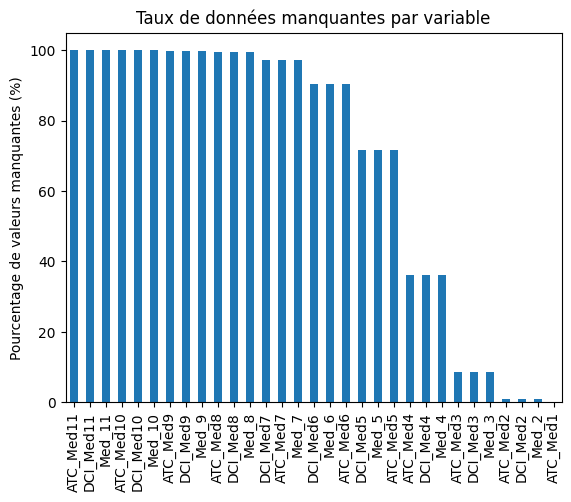

In [34]:
missing[missing > 0].plot(kind="bar")
plt.ylabel("Pourcentage de valeurs manquantes (%)")
plt.title("Taux de données manquantes par variable")
plt.show()


### tb

In [35]:
resume = pd.DataFrame({
    "Nombre total de prescriptions": [len(df)],
    "Médicaments moyens par traitement": [df["nb_medicaments"].mean()],
    "Classes ATC moyennes par traitement": [df["nb_classes_ATC"].mean()]
})

resume


,Nombre total de prescriptions,Médicaments moyens par traitement,Classes ATC moyennes par traitement
0,19220,3.962331,3.893965
